<a href="https://colab.research.google.com/github/meharkhanniazi/AI-DS-Saylani-Assignments/blob/master/Deep_Learning_Example_2_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Example 2

In [1]:
#Loading the IMDB dataset

In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 1s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [3]:
#A look at the training data and labels
print(train_data[0])
print( train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [4]:
#A look at the training data
max([max(sequence) for sequence in train_data])

9999

In [5]:
#Decoding the integer sequences back into sentences
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


In [6]:
#Encoding the integer sequences into a binary matrix
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
 # Create an all-zero matrix of shape (len(sequences), dimension)
 results = np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
  results[i, sequence] = 1. # set specific indices of results[i] to 1s
 return results
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [7]:
#An encoded sample
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
# Encoding the labels
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
#Our model definition
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
#Compiling our model
model.compile(optimizer='rmsprop',
 loss='binary_crossentropy',
 metrics=['accuracy'])

In [11]:
# Configuring the optimizer
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [12]:
#Using custom losses and metrics
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
 loss=losses.binary_crossentropy,
 metrics=[metrics.binary_accuracy])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [13]:
# Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
#Training our model
history = model.fit(partial_x_train, partial_y_train,epochs=6, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/6
30/30 [==============================] - 16s 58ms/step - loss: 0.5929 - binary_accuracy: 0.7016 - val_loss: 0.3924 - val_binary_accuracy: 0.8700
Epoch 2/6
30/30 [==============================] - 1s 35ms/step - loss: 0.3355 - binary_accuracy: 0.8964 - val_loss: 0.3203 - val_binary_accuracy: 0.8740
Epoch 3/6
30/30 [==============================] - 1s 35ms/step - loss: 0.2345 - binary_accuracy: 0.9251 - val_loss: 0.3069 - val_binary_accuracy: 0.8750
Epoch 4/6
30/30 [==============================] - 1s 34ms/step - loss: 0.1840 - binary_accuracy: 0.9399 - val_loss: 0.2933 - val_binary_accuracy: 0.8810
Epoch 5/6
30/30 [==============================] - 1s 35ms/step - loss: 0.1412 - binary_accuracy: 0.9568 - val_loss: 0.3386 - val_binary_accuracy: 0.8664
Epoch 6/6
30/30 [==============================] - 1s 34ms/step - loss: 0.1158 - binary_accuracy: 0.9637 - val_loss: 0.2991 - val_binary_accuracy: 0.8854


In [15]:
#The dictionary
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

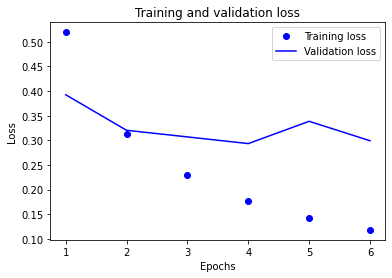

In [16]:
#Plotting the training and validation loss
import matplotlib.pyplot as plt
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

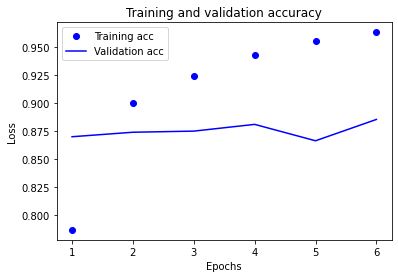

In [17]:
#Plotting the training and validation accuracy
plt.clf() # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
#Re-training a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
 loss='binary_crossentropy',
 metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 27ms/step - loss: 0.5538 - accuracy: 0.7434
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2753 - accuracy: 0.9103
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2012 - accuracy: 0.9309
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2917 - accuracy: 0.8856


In [19]:
#Our Final Results
print( results)

[0.2917028069496155, 0.8855999708175659]
